In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)
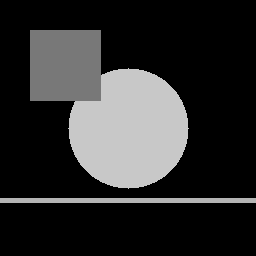

In [2]:
# Synthetic base image
base = np.zeros((256, 256), dtype=np.uint8)
cv2.circle(base, (128, 128), 60, 200, -1)
cv2.rectangle(base, (30, 30), (100, 100), 120, -1)
cv2.line(base, (0, 200), (255, 200), 180, 3)

In [3]:
def add_noise(image, noise_type):
    if noise_type == "gaussian":
        noise = np.random.normal(0, 25, image.shape)
        return np.clip(image + noise, 0, 255).astype(np.uint8)

    elif noise_type == "salt_pepper":
        noisy = image.copy()
        prob = 0.02
        rnd = np.random.rand(*image.shape)
        noisy[rnd < prob] = 0
        noisy[rnd > 1 - prob] = 255
        return noisy

    elif noise_type == "speckle":
        noise = np.random.randn(*image.shape)
        return np.clip(image + image * noise * 0.2, 0, 255).astype(np.uint8)

    elif noise_type == "poisson":
        return np.clip(np.random.poisson(image), 0, 255).astype(np.uint8)

    elif noise_type == "blur":
        return cv2.GaussianBlur(image, (9, 9), 2)

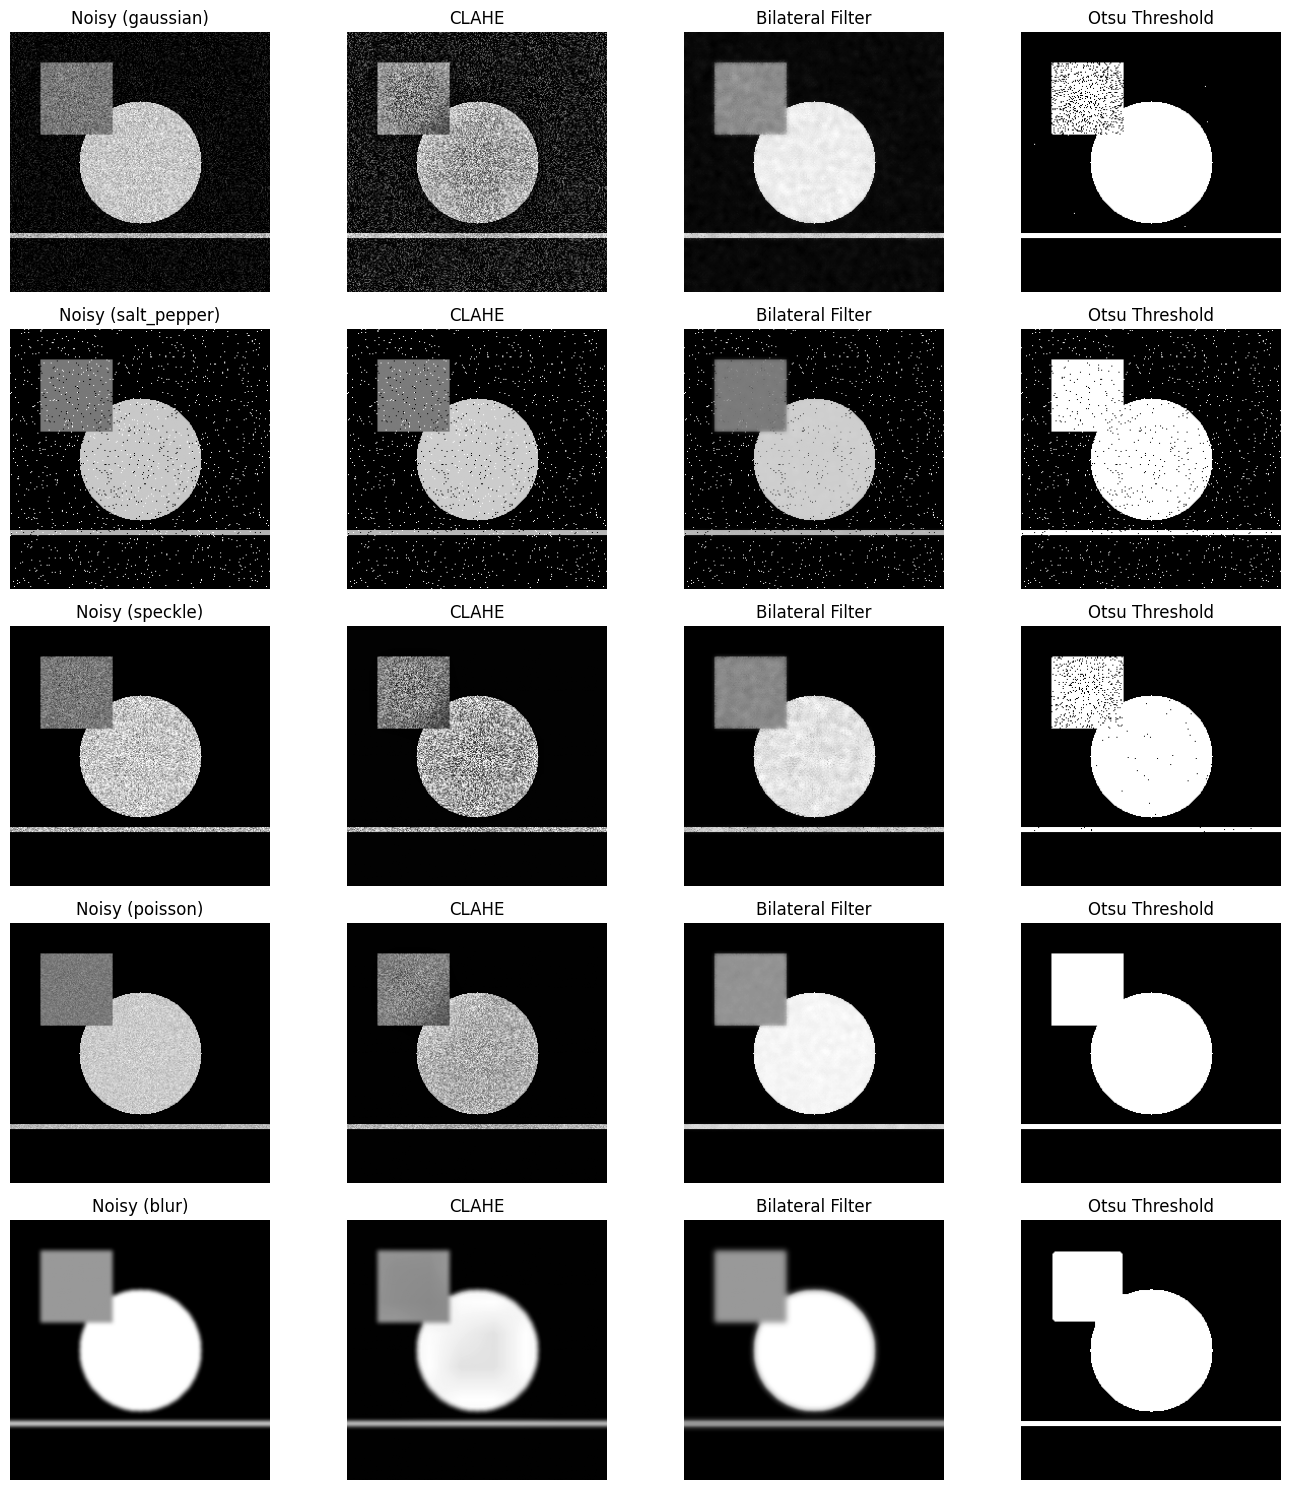

In [4]:
def enhancement_pipeline(image):
    # CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_img = clahe.apply(image)

    # Bilateral Filter
    bilateral_img = cv2.bilateralFilter(image, 9, 75, 75)

    # Otsu Thresholding
    _, otsu_img = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    return clahe_img, bilateral_img, otsu_img

noise_types = ["gaussian", "salt_pepper", "speckle", "poisson", "blur"]

plt.figure(figsize=(14, 15))

row = 0
for noise in noise_types:
    noisy_img = add_noise(base, noise)
    clahe_img, bilateral_img, otsu_img = enhancement_pipeline(noisy_img)

    images = [noisy_img, clahe_img, bilateral_img, otsu_img]
    titles = [f"Noisy ({noise})", "CLAHE", "Bilateral Filter", "Otsu Threshold"]

    for col in range(4):
        plt.subplot(len(noise_types), 4, row * 4 + col + 1)
        plt.imshow(images[col], cmap="gray")
        plt.title(titles[col])
        plt.axis("off")

    row += 1

plt.tight_layout()
plt.show()